In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
inv=pd.read_csv("/home/apoorva/Documents/ML Practice/DA_Assignment_Data/inventory_data.csv")

In [4]:
inv.head(45)

,product_id,library_product_name,product_category,store_id,mrp,selling_price,uom,unit,measurement_unit,measurement_value,parent_category_name
0,32753,Haldiram's Potato Lite,Chips & Wafers,106058,5.0,5.0,G,18.0,NaN,0.0,"Chocolates, Snacks & Namkeen"
1,32753,Haldiram's Potato Lite,Farsan & Namkeen,106058,5.0,5.0,G,18.0,NaN,0.0,"Chocolates, Snacks & Namkeen"
2,32765,Haldiram's Mixture,Farsan & Namkeen,106058,5.0,5.0,NaN,NaN,GMs,25.0,"Chocolates, Snacks & Namkeen"
3,33458,Amul Buttermilk (200 ml),Dairy Products,106058,10.0,10.0,NaN,NaN,NaN,0.0,Dairy
4,33479,Bisleri Water,Water & Soda,106058,20.0,20.0,NaN,NaN,L,1.0,Drinks
5,33479,Bisleri Water,All Drinks,106058,20.0,20.0,NaN,NaN,L,1.0,Drinks
6,33516,Parle Frooti Mango Drink,"Instant Drink Mixes, Squash & Syrups",106058,10.0,10.0,NaN,NaN,ML,160.0,Drinks
7,33516,Parle Frooti Mango Drink,All Drinks,106058,10.0,10.0,NaN,NaN,ML,160.0,Drinks
8,34015,Aquafina Water (1 L),Water & Soda,106058,19.0,19.0,NaN,NaN,NaN,0.0,Drinks
9,34424,Maaza Tetra Pack (150 ml),All Drinks,106058,10.0,10.0,NaN,NaN,NaN,0.0,Drinks


#1 Analyse average and median number of products in each store.

In [5]:
# Number of distinct products in respective stores
inv.groupby('store_id')['product_id'].nunique().reset_index().sort_values(by='store_id', ascending=True)

,store_id,product_id
0,11643,1440
1,16286,2308
2,23416,3313
3,32723,1841
4,40879,2170
...,...,...
118,950515,921
119,966919,2071
120,969172,1768
121,979348,1759


In [6]:
avg_prod=inv.groupby('store_id')['product_id'].nunique() 

In [7]:
#Average number of products in each store
avg_prod.mean()

1239.4471544715448

In [8]:
# Median number of products in each store.
avg_prod.median()

1440.0

In [216]:
order=pd.read_csv("/home/apoorva/Documents/ML Practice/DA_Assignment_Data/order_products.csv")

In [217]:
order.head(45)

,product_id,product_name,order_id,customer_id,store_id,store_category,product_category_name,product_mrp,selling_price,date_of_order
0,582930.0,Garlic,10018445,0fed404b19f84eed902da84ee78e7c84,241818,Fruits & Vegetables Shops,Fresh Vegetables,70.0,70.0,2020-08-23
1,582912.0,Watana,10018445,0fed404b19f84eed902da84ee78e7c84,241818,Fruits & Vegetables Shops,Fresh Vegetables,25.0,60.0,2020-08-23
2,181169.0,Fortune Soyabean Oil,10022447,b1a3b25039c3431191f306fde345f9b3,428028,Grocers,Edible Oils,120.0,112.0,2020-07-27
3,181169.0,Fortune Soyabean Oil,10022447,b1a3b25039c3431191f306fde345f9b3,428028,Grocers,All Products,120.0,112.0,2020-07-27
4,186229.0,Tata Sampann High Protein Toor Dal,10022447,b1a3b25039c3431191f306fde345f9b3,428028,Grocers,Dals | Pulses,149.0,130.0,2020-07-27
5,186229.0,Tata Sampann High Protein Toor Dal,10022447,b1a3b25039c3431191f306fde345f9b3,428028,Grocers,All Products,149.0,130.0,2020-07-27
6,68885.0,Balaji Wafers Magic Masala (40 g),10022447,b1a3b25039c3431191f306fde345f9b3,428028,Grocers,Spices | Masalas,10.0,9.8,2020-07-27
7,607039.0,Guava,10027465,08b21bd741d44a9aaac9497732ed02b3,241818,Fruits & Vegetables Shops,Fresh Fruits,100.0,90.0,2020-08-20
8,582883.0,Lady Finger,10027465,08b21bd741d44a9aaac9497732ed02b3,241818,Fruits & Vegetables Shops,Fresh Vegetables,30.0,30.0,2020-08-20
9,582881.0,Beet Root,10027465,08b21bd741d44a9aaac9497732ed02b3,241818,Fruits & Vegetables Shops,Fresh Vegetables,30.0,30.0,2020-08-20


#2 Calculate the number of stores where the selling price of products is different from the MRP

In [11]:
#Printing records where selling price is not equal to MRP

print(inv[inv['selling_price']!=inv['mrp']].groupby('store_id').nunique())

          product_id  library_product_name  product_category  store_id  mrp  \
store_id                                                                      
11643              3                     3                 4         1    3   
23416            543                   492                58         1  166   
32723            261                   125                18         1   87   
40879             28                    19                13         1   22   
63308            451                   409                58         1  128   
...              ...                   ...               ...       ...  ...   
950515            55                    23                 4         1   21   
966919           118                    97                36         1   72   
969172            43                    29                12         1   27   
979348            18                    12                 8         1   15   
982435             6                     3          

In [12]:
count_stores=inv[inv['selling_price']!=inv['mrp']].groupby('store_id').nunique()

In [13]:
count_stores.count()

product_id              93
library_product_name    93
product_category        93
store_id                93
mrp                     93
selling_price           93
uom                     93
unit                    93
measurement_unit        93
measurement_value       93
parent_category_name    93
dtype: int64

Number of stores where the selling price of products is different from the MRP is 93

In [67]:
count_products=inv[inv['selling_price']!=inv['mrp']].groupby('library_product_name').nunique()
count_products.count()

product_id              1297
library_product_name    1297
product_category        1297
store_id                1297
mrp                     1297
selling_price           1297
uom                     1297
unit                    1297
measurement_unit        1297
measurement_value       1297
parent_category_name    1297
Total Price             1297
dtype: int64

Out of total 1956 products there are 1297 products which were sold at a price different than MRP

#3 Analyse the MRP and Selling Price variance of each of these products across the stores. Please use the product name and quantity to identify the exact item. 
Identify how many stores are selling each product at a discounted price as opposed to a higher markup price. 

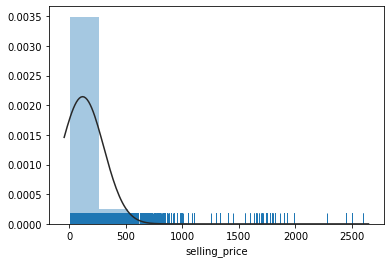

In [35]:
from scipy.stats import norm

sns.distplot(inv['selling_price'], fit=norm, kde=False, rug=True, bins=10)

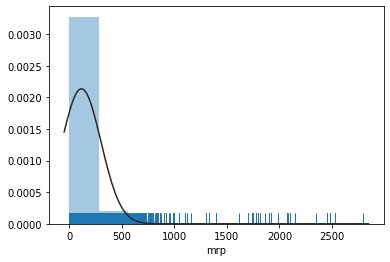

In [33]:
sns.distplot(inv['mrp'], fit=norm, kde=False, rug=True, bins=10)

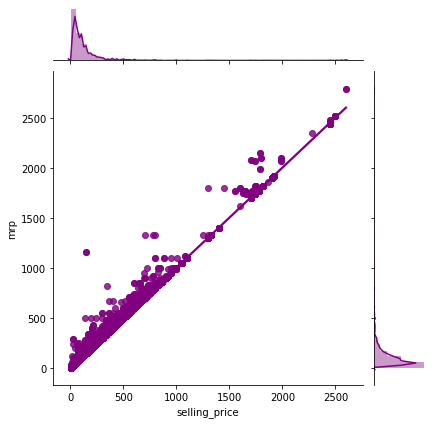

In [97]:
sns.jointplot(x='selling_price',y='mrp',data=inv,color='purple', kind='reg')


In [57]:
#Variance of selling price

print(inv.var()['selling_price'])

34607.921661912296


In [98]:
inv.selling_price.describe()

count    220000.000000
mean        116.657866
std         186.032045
min           1.000000
25%          28.000000
50%          65.000000
75%         130.000000
max        2599.000000
Name: selling_price, dtype: float64

In [56]:
#Variance of MRP

print(inv.var()['mrp'])

34888.14812240974


In [97]:
inv.mrp.describe()

count    220000.000000
mean        117.153116
std         186.783693
min           1.000000
25%          29.000000
50%          65.000000
75%         130.000000
max        2800.000000
Name: mrp, dtype: float64

In [175]:
#Calculating Discount

inv["Discount"]=inv["mrp"]-inv["selling_price"]
inv.sort_values(by="Discount", ascending=False)

,product_id,library_product_name,product_category,store_id,mrp,selling_price,uom,unit,measurement_unit,measurement_value,parent_category_name,Total Price,Discount
91858,605937,Samrat Chana Besan,All Products,419183,1160.0,145.0,NaN,NaN,KGs,1.0,"Grains, Oil & Masala",NaN,1015.0
91857,605937,Samrat Chana Besan,Atta & Flour,419183,1160.0,145.0,NaN,NaN,KGs,1.0,"Grains, Oil & Masala",NaN,1015.0
159418,578258,Badam,Dry Fruits & Nuts,780734,1330.0,700.0,NaN,NaN,KGs,1.0,"Dry Fruits, Mithai & Sweets",NaN,630.0
44119,578258,Badam,Dry Fruits & Nuts,273407,1330.0,780.0,NaN,NaN,KGs,1.0,"Dry Fruits, Mithai & Sweets",NaN,550.0
182272,605138,Almonds,Dry Fruits & Nuts,850638,1330.0,800.0,NaN,NaN,KGs,1.0,"Dry Fruits, Mithai & Sweets",NaN,530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74861,605924,RRO Premium Mustard Oil,All Products,328347,88.0,88.0,NaN,NaN,ML,500.0,"Grains, Oil & Masala",NaN,0.0
74862,184038,Complan Kesar Badam Health Drink,Health Drinks & Supplements,328347,120.0,120.0,NaN,NaN,GMs,200.0,Drinks,NaN,0.0
219999,606207,Britannia Nutri Choice Oats Cookies Chocolate ...,Cookies & Biscuits,982435,20.0,20.0,NaN,NaN,GMs,75.0,"Chocolates, Snacks & Namkeen",NaN,0.0
25345,32768,Haldiram's Boondi (40 g),Farsan & Namkeen,23416,10.0,12.0,NaN,NaN,NaN,0.0,"Chocolates, Snacks & Namkeen",NaN,-2.0


In [178]:
inv[inv["Discount"]>0]['store_id'].nunique()

93

In [179]:
inv[inv["Discount"]>0]['library_product_name'].nunique()

1296

In [73]:
#Presenting no of stores for each Product [There are 1956 distinct products in total]
inv.groupby('library_product_name')['store_id'].nunique().reset_index().sort_values(by='store_id', ascending=True)

,library_product_name,store_id
1667,Stayfree Secure Regular (7 pads),1
103,BADAM,1
463,Dettol Original Soap (Pack Of 4),1
1787,Tata salt (1kg),1
461,Dettol Original Soap (42 g),1
...,...,...
1191,Maggi 2-Minute Noodles,86
440,Dettol Antiseptic Liquid,86
135,Bisleri Water,87
761,Good Knight Activ Cartridge,88


In [74]:
#Presenting no of stores for each product where Selling Price < MRP
inv[inv['selling_price']<inv['mrp']].groupby('library_product_name')['store_id'].nunique().reset_index().sort_values(by='store_id', ascending=True)

,library_product_name,store_id
0,24 Mantra Organic Green Split Moong Dal (500 g),1
889,Nyle Naturals Damage Repair Shampoo,1
888,Nycil Cool Prickly Heat Powder Lime (150 g),1
435,Gillette Mach 3 Cartridges (8 pcs),1
437,Gillette Mach 3 Razor (1 pc),1
...,...,...
12,Aashirwaad Atta,16
1208,Toor Dal (1 kg),16
890,Onion,16
1102,Sugar,20


In [76]:
#Presenting no of distinct products in respective stores.
inv[inv['selling_price']<inv['mrp']].groupby('store_id')['library_product_name'].nunique().reset_index().sort_values(by='store_id', ascending=True)

,store_id,library_product_name
0,11643,3
1,23416,491
2,32723,125
3,40879,19
4,63308,409
...,...,...
88,950515,23
89,966919,97
90,969172,29
91,979348,12


1. Ofcorse, the MRP and Selling Price have strong relationship with each other. 

2. From the above graphs it is clear that most of the products are sold below 1000Rs. 

3. There are 93 stores where products have been sold at prices less than MRP. 

4. Out of total 1956 products there are 1297 products which were sold at a price different than MRP

5. Vast majority of the items priced at 116. 

6. The average degree to which each point differs from the mean—the average of all data points that is the variance    is 34607.92 as u can see there are so many outliers. 

7. The standard deviation meaning at how far from the mean a group of numbers is the price actually is 186.

In [42]:
#Maximum sold out Products in terms of quantity are Personal care Products.
inv.groupby(["library_product_name"]).sum().sort_values("unit", ascending=False)

,product_id,store_id,mrp,selling_price,unit,measurement_value
library_product_name,,,,,,
Patanjali Dant Kanti Dental Cream Natural,140198049,115349282,29935.00,29911.5,17100.0,46800.0
Sunday Sunflower Oil,259540260,268004252,376850.09,374355.0,16320.0,4072.0
Patanjali Kesh Kanti Milk Protein Hair Cleanser Shampoo,36198055,28389640,5700.00,5700.0,11800.0,12000.0
Patanjali Kesh Kanti Shikakai Hair Cleanser Shampoo,36197997,28389640,5700.00,5700.0,11800.0,12000.0
Sunday Sunflower Oil - 1.0L,25462184,19282316,4272.00,4272.0,5280.0,44.0
...,...,...,...,...,...,...
Gillette 7'O Clock Super Platinum (Pack of 10),401830,4915545,605.00,604.0,0.0,0.0
Gillette 7 o'clock Super Stainless (1 pkt),486772,4550825,270.00,270.0,0.0,0.0
Ghadi Detergent Powder,36563161,75853292,6546.00,6529.0,0.0,38079.0


In [180]:
#Calculating the Total Price of each product
inv["Total Price"] = inv["unit"] * inv["selling_price"]
inv.head(40)

,product_id,library_product_name,product_category,store_id,mrp,selling_price,uom,unit,measurement_unit,measurement_value,parent_category_name,Total Price,Discount
0,32753,Haldiram's Potato Lite,Chips & Wafers,106058,5.0,5.0,G,18.0,NaN,0.0,"Chocolates, Snacks & Namkeen",90.0,0.0
1,32753,Haldiram's Potato Lite,Farsan & Namkeen,106058,5.0,5.0,G,18.0,NaN,0.0,"Chocolates, Snacks & Namkeen",90.0,0.0
2,32765,Haldiram's Mixture,Farsan & Namkeen,106058,5.0,5.0,NaN,NaN,GMs,25.0,"Chocolates, Snacks & Namkeen",NaN,0.0
3,33458,Amul Buttermilk (200 ml),Dairy Products,106058,10.0,10.0,NaN,NaN,NaN,0.0,Dairy,NaN,0.0
4,33479,Bisleri Water,Water & Soda,106058,20.0,20.0,NaN,NaN,L,1.0,Drinks,NaN,0.0
5,33479,Bisleri Water,All Drinks,106058,20.0,20.0,NaN,NaN,L,1.0,Drinks,NaN,0.0
6,33516,Parle Frooti Mango Drink,"Instant Drink Mixes, Squash & Syrups",106058,10.0,10.0,NaN,NaN,ML,160.0,Drinks,NaN,0.0
7,33516,Parle Frooti Mango Drink,All Drinks,106058,10.0,10.0,NaN,NaN,ML,160.0,Drinks,NaN,0.0
8,34015,Aquafina Water (1 L),Water & Soda,106058,19.0,19.0,NaN,NaN,NaN,0.0,Drinks,NaN,0.0
9,34424,Maaza Tetra Pack (150 ml),All Drinks,106058,10.0,10.0,NaN,NaN,NaN,0.0,Drinks,NaN,0.0


In [45]:
# Maximum sold out Products in terms of Total Price are Personal care , edible oils, etc.
inv.groupby(["library_product_name"]).sum().sort_values("Total Price", ascending=False).head()

,product_id,store_id,mrp,selling_price,unit,measurement_value,Total Price
library_product_name,,,,,,,
Sunday Sunflower Oil,259540260,268004252,376850.09,374355.0,16320.0,4072.0,1928160.0
Patanjali Kesh Kanti Milk Protein Hair Cleanser Shampoo,36198055,28389640,5700.00,5700.0,11800.0,12000.0,1121000.0
Patanjali Kesh Kanti Shikakai Hair Cleanser Shampoo,36197997,28389640,5700.00,5700.0,11800.0,12000.0,1121000.0
Patanjali Dant Kanti Dental Cream Natural,140198049,115349282,29935.00,29911.5,17100.0,46800.0,1103500.0
Sunday Sunflower Oil - 1.0L,25462184,19282316,4272.00,4272.0,5280.0,44.0,512640.0


In [94]:
inv['Total Price'].describe()

count      682.000000
mean      8968.747801
std       7300.770554
min         20.000000
25%       1395.000000
50%      10080.000000
75%      15200.000000
max      19000.000000
Name: Total Price, dtype: float64

In [218]:
order['date_of_order'] = pd.to_datetime(order['date_of_order'])


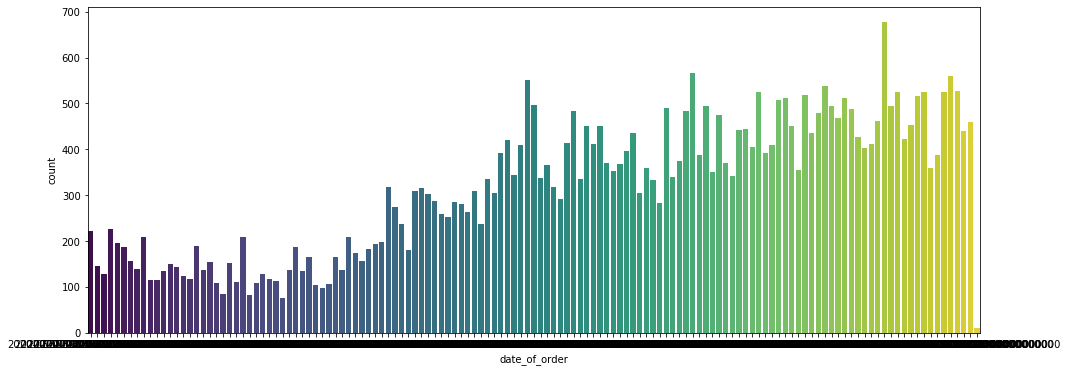

In [219]:
#Presenting orders of data datewise and the sales increase rapidly in the month May, 2020.
plt.figure(figsize=(16,6))

sns.countplot(x='date_of_order',data=order,palette='viridis')

Using the orders data, compute the optimum selling price for the products available. You would be expected to give a price recommendation for at least 10 products. 

In [220]:
order['selling_price']= pd.to_numeric(order['selling_price'],  errors = 'coerce')
order['date_of_order']= pd.to_numeric(order['date_of_order'],  errors = 'coerce')
print (order.dtypes) 

# To remove this error, we can use errors=’coerce’, to convert the value at this position to be converted to NaN. 

product_id               float64
product_name              object
order_id                  object
customer_id               object
store_id                  object
store_category            object
product_category_name     object
product_mrp              float64
selling_price            float64
date_of_order              int64
dtype: object


In [221]:
#Finding Average SP of each product. 
order.groupby('product_name')['selling_price'].mean().sort_values(ascending=False).head()


product_name
Prasang(C) Ghee(1Ltrx12PP)Chasis      5100.0
Mangos Hapus(8 Dozen)96 units 150g    2800.0
Guinea Filtered Groundnut Oil         2599.0
Chappi                                2304.0
Green Cardamom                        2000.0
Name: selling_price, dtype: float64

In [222]:
#Most sold out products 
order.groupby('product_name')['selling_price'].count().sort_values(ascending=False).head()

product_name
Amul Pure Ghee      557
White Vatana        531
Tomato              416
Yellow Moong Dal    390
Potato (1 kg)       352
Name: selling_price, dtype: int64

In [223]:
#Calculating Discount

order["Discount"]=order["product_mrp"]-order["selling_price"]
order.sort_values(by="Discount", ascending=False)


,product_id,product_name,order_id,customer_id,store_id,store_category,product_category_name,product_mrp,selling_price,date_of_order,Discount
15591,630847.0,Mayur,43400164,4dd4fee24207424697666e9d7b2ec94a,124742,Grocers,Mutton & Lamb,5000.0,10.0,1597104000000000000,4990.0
2235,33512.0,Elaichi Black (1 kg),14701743,4dd4fee24207424697666e9d7b2ec94a,132095,Grocers,Spices | Masalas,3600.0,1200.0,1596412800000000000,2400.0
20170,188710.0,Akhrot-Tukda*1Kg,52654390,9d87cf5b91734f39bde905751c3f2a58,428028,Grocers,All Products,1400.0,75.0,1596412800000000000,1325.0
2236,33525.0,Cloves (1 kg),14701743,4dd4fee24207424697666e9d7b2ec94a,132095,Grocers,Spices | Masalas,2000.0,700.0,1596412800000000000,1300.0
35059,543630.0,Organic Alphonso Mango (1 Dozen),83456086,3211b1f51f0c4d7fbf3d50e0cabee1eb,413752,Fruits & Vegetables Shops,Fresh Fruits,1600.0,380.0,1591660800000000000,1220.0
...,...,...,...,...,...,...,...,...,...,...,...
18718,NaN,49839900,f140c533db394911861d739c768a360e,917970,Fruits & Vegetables Shops,Fresh Fruits,25.0,34.0,NaN,-9223372036854775808,NaN
18827,616837.0,Banana Pachabale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9223372036854775808,NaN
18828,NaN,50070266,f140c533db394911861d739c768a360e,917970,Fruits & Vegetables Shops,Fresh Fruits,20.0,20.0,NaN,-9223372036854775808,NaN
19306,616832.0,Robusta Banana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9223372036854775808,NaN


In [226]:
# Finding Average SP of each product where Selling Price is less than MRP

average_SP=pd.DataFrame(order[order['Discount']> 0].groupby('product_name')['selling_price'].mean())
average_SP.head()

,selling_price
product_name,
Basmati Rice best 1 Quality,78.0
Dabur 100% Pure Honey Squeezy,280.0
Doms 12 Water Colour Pens Mini,14.0
"Fair & Lovely Advanced Multi Vitamin Face Cream,",53.0
Guntur Chilli Loose,120.0


In [162]:
# Most sold out products where Selling Price is less than MRP

average_SP['number_of_sales']=pd.DataFrame(order[order['Dis'].groupby('product_name')['selling_price'].count())
average_SP.head()

,selling_price,number_of_sales
product_name,,
Basmati Rice best 1 Quality,78.0,1
Dabur 100% Pure Honey Squeezy,280.0,1
Doms 12 Water Colour Pens Mini,14.0,1
"Fair & Lovely Advanced Multi Vitamin Face Cream,",53.0,2
Guntur Chilli Loose,120.0,1


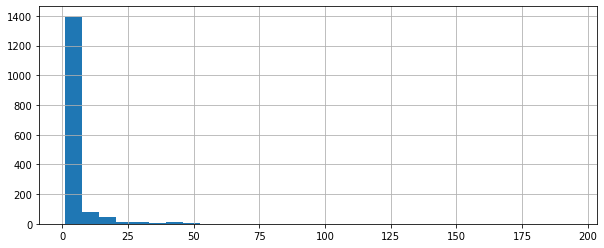

In [168]:
plt.figure(figsize=(10,4))
average_SP['number_of_sales'].hist(bins=30)

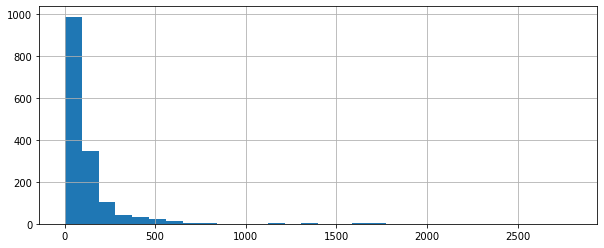

In [167]:
plt.figure(figsize=(10,4))
average_SP['selling_price'].hist(bins=30)

In [ ]:
sns.jointplot(x='selling_price',y='num of ratings',data=ratings,alpha=0.5)